In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [22]:
def multiplot(data,features,plottype,nrows,ncols,figsize,y=None,colorize=False):
    """ This function draw a multi plot for 3 types of plots ["regplot","distplot","coutplot"]"""
    n = 0
    plt.figure(1)
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    
    if colorize:
        colors = sns.color_palette(n_colors=(nrows*ncols))
    else :
        colors = [None]*(nrows*ncols)
        
    for row in range(ncols):
        for col in range(nrows):
            
            if plottype == 'regplot':
                if y == None:
                    raise ValueError('y value is needed with regplot type')
                
                sns.regplot(data = data, x = features[n], y = y ,ax=axes[row,col], color = colors[n])
                correlation = np.corrcoef(data[features[n]],data[y])[0,1]
                axes[row,col].set_title("Correlation {:.2f}".format(correlation))
            
            elif plottype == 'distplot':
                sns.distplot(a = data[features[n]],ax = axes[row,col],color=colors[n])
                skewness = data[features[n]].skew()
                axes[row,col].legend(["Skew : {:.2f}".format(skewness)])
            
            elif plottype in ['countplot']:
                g = sns.countplot(x = data[features[n]], y = y, ax = axes[row,col],color = colors[n])
                g = plt.setp(g.get_xticklabels(), rotation=45)
                
            n += 1
    plt.tight_layout()
    plt.show()
    plt.gcf().clear()
    
#found this neat function to easily plot multiple figures of the same type.

In [2]:
file='step1_output.csv'
df=pd.read_csv(file)

In [3]:
df

,Unnamed: 0,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,0,1,0,1,0,0,1,0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,1,0,0,1,0,1,0,0,1,0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,2,0,0,1,0,1,0,0,0,0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,3,0,0,1,0,1,0,0,0,0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,4,0,0,1,0,1,0,0,0,0,...,192,84,0,0,0,0,0,12,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1454,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,6,2006,NaN
2915,1455,0,0,0,1,1,0,0,1,0,...,0,24,0,0,0,0,0,4,2006,NaN
2916,1456,0,0,1,0,1,0,0,1,0,...,474,0,0,0,0,0,0,9,2006,NaN
2917,1457,0,0,1,0,1,0,0,1,0,...,80,32,0,0,0,0,700,7,2006,NaN


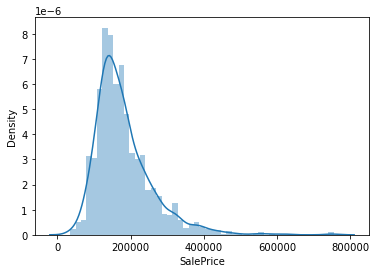

In [4]:
sns.distplot(df['SalePrice']);
#observation = deviates from normal distribution, skews positively,

In [8]:
#skewness and kurtosis
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Index(['Unnamed: 0', 'FV', 'RH', 'RL', 'RM', 'Pave', 'IR2', 'IR3', 'Reg',
       'HLS',
       ...
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object', length=179)


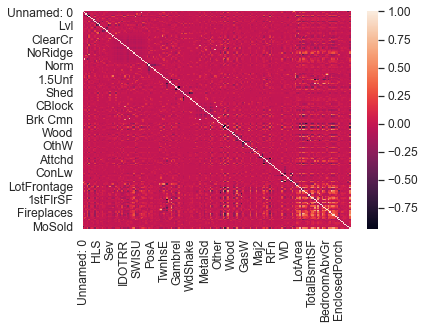

In [11]:
corrmat = df.corr()
g = sns.heatmap(df.corr())

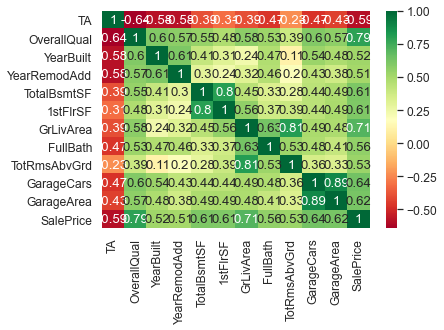

In [13]:
# most correlated features
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


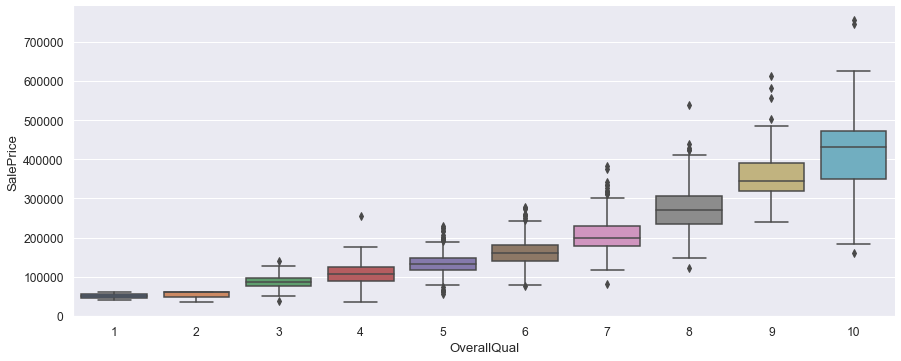

In [14]:
g = sns.factorplot(x="OverallQual",y="SalePrice",data=df,kind='box',aspect=2.5)

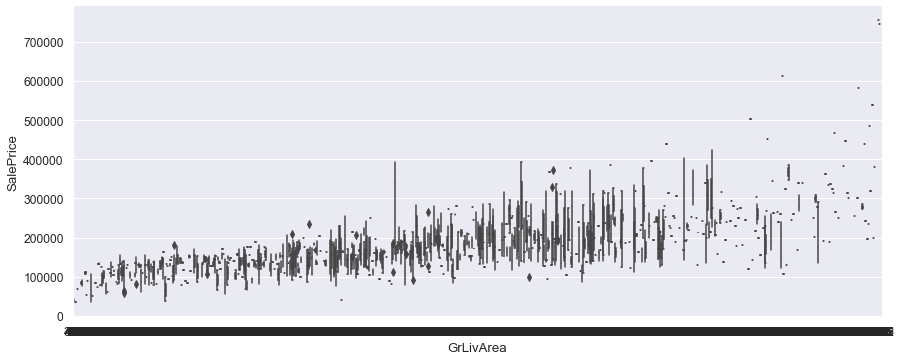

In [20]:
g = sns.factorplot(x="GrLivArea",y="SalePrice",data=df,kind='box',aspect=2.5)

<Figure size 432x288 with 0 Axes>

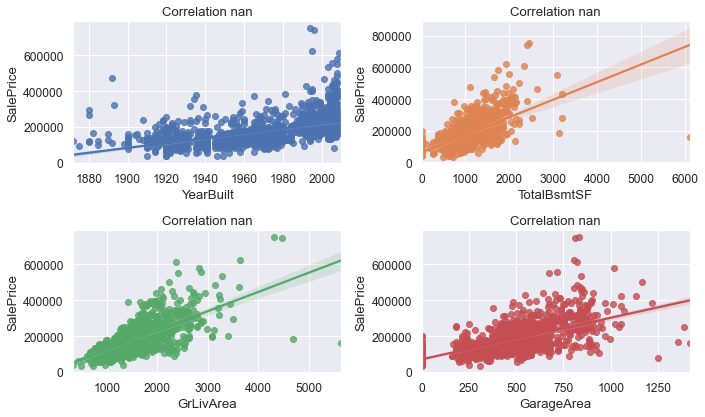

<Figure size 432x288 with 0 Axes>

In [23]:
feats = ["YearBuilt","TotalBsmtSF","GrLivArea","GarageArea"]

multiplot(data = df,features = feats,plottype = "regplot",nrows = 2, ncols = 2,
          figsize = (10,6),y = "SalePrice", colorize = True)

In [28]:
missing_features = df.columns[df.isnull().any()]

In [29]:

df[missing_features].isnull().sum()

SalePrice    1459
dtype: int64

the only thing thats missing is the sales data and thats okay because i dont want to impute 
in order to keep the data from skewing. I just have to be mindful when choosing the test_train_split. 

In [ ]:
#next step should be reducing skewness and fitting the models. 